In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from qutip import *
import laser

%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport laser

# from matplotlib import rc
# rc('xtick', labelsize=14) 
# rc('ytick', labelsize=14) 
# np.set_printoptions(threshold='nan', precision=6, suppress=True)

# Equation of Motion for the Density Matrix of the Cavity Field

For $\rho_{nm}$, we have

$$
\begin{aligned}
\dot{\rho}_{nm} =
&- \frac{M_{nm}A}{1 + N_{nm}B/A} \rho_{nm} + \frac{\sqrt{nm}A}{1 + N_{n-1,m-1}B/A} \rho_{n-1,m-1} \\
&- \frac{C}{2}(n+m)\rho_{nm} + C\sqrt{(n+1)(m+1)} \rho_{n+1, m+1}
\end{aligned}
$$

where
$$
\begin{aligned}
A &= \frac{2r_a g^2}{\gamma^2},\\
B &= \frac{4g^2}{\gamma^2} A,\\
M_{nm} &= \frac{1}{2}(n+m+2) + (n-m)^2\frac{B}{8A},\\
N_{nm} &= \frac{1}{2}(n+m+2) + (n-m)^2\frac{B}{16A}.
\end{aligned}
$$

In particular, for diagonal elements, we have

$$
\begin{aligned}
\dot{p}(n) =
&- \frac{(n+1)A}{1 + (n+1)B/A} p(n) + \frac{nA}{1 + nB/A} p(n-1) \\
&- Cnp(n) + C(n+1)p(n+1)
\end{aligned}
$$

**Parematers**

In [148]:
# parameters
w_c = 2.0 * np.pi
w_a = 2.0 * np.pi
g = g  = 0.0025

gamma = 0.01
kappa = 0.01

**Initial state of the cavity field: $\psi_0 = \lvert 0 \rangle$**

In [149]:
# initial cavity state
N_max = 50
n_list = np.arange(N_max)
init_psi = fock(N_max, 0)

## 1. 20% above threshold

- A = 0.012
- B = 0.0048
- C = 0.01

In [150]:
ra = 0.096 # pumping rate
lp = laser.LaserOneMode(w_c, w_a, g, ra, gamma, kappa) # create laser object

In [151]:
lp.get_abc() # master equation parameters

{'A': 0.012, 'B': 0.003, 'C': 0.01}

In [152]:
# list of time for ode
t_list = 0.1 * 2 * np.pi / w_c * np.arange(20000)
# state evolution
lp.pn_evolve(init_psi, N_max, t_list)

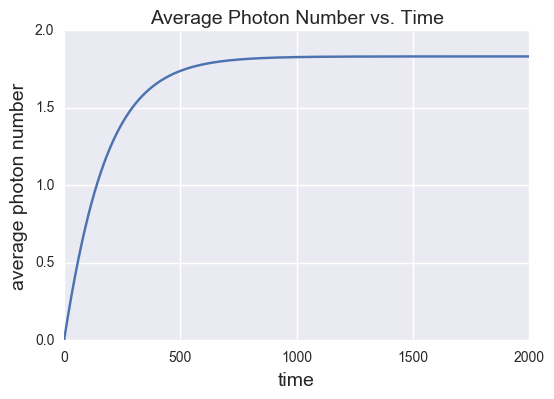

In [153]:
# plot average photon numbers vs. time
lp.plot_n_vs_time();

calculating von Neuman entropy ...


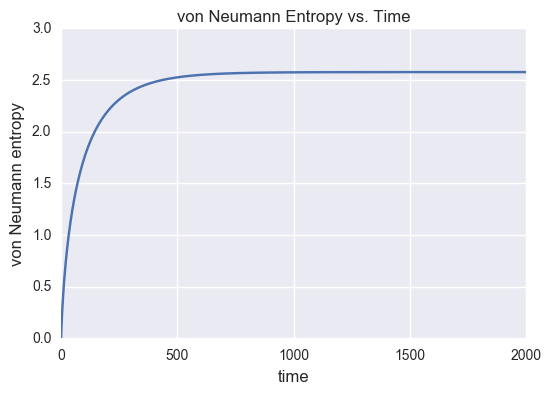

In [154]:
lp.plot_entropy_vs_time();

## 2. At the threshold

- A = 0.01
- B = 0.004
- C = 0.01

In [155]:
ra = 0.08
la = laser.LaserOneMode(w_c, w_a, g, ra, gamma, kappa)

In [156]:
la.get_abc()

{'A': 0.010000000000000002, 'B': 0.0025000000000000005, 'C': 0.01}

In [157]:
# list of time for ode
t_list = 0.1 * 2 * np.pi / w_c * np.arange(20000)
# evolution
la.pn_evolve(init_psi, N_max, t_list)

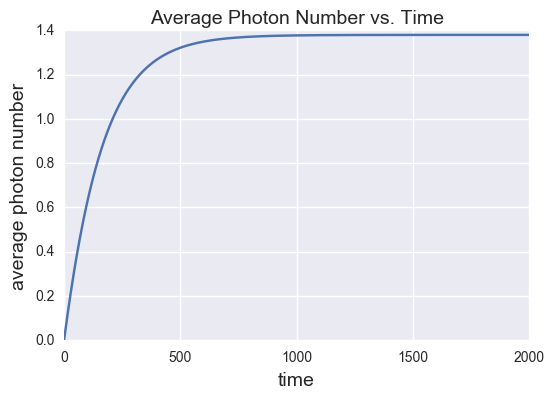

In [158]:
la.plot_n_vs_time();

calculating von Neuman entropy ...


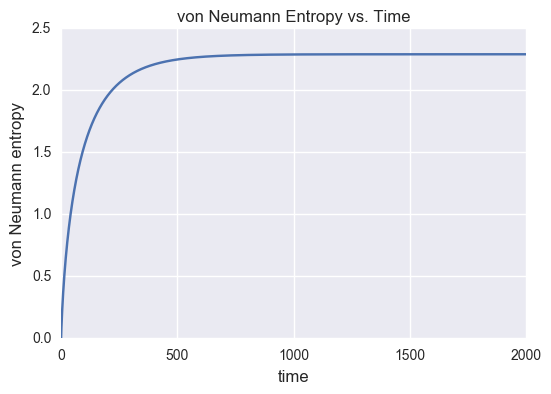

In [159]:
la.plot_entropy_vs_time();

## 3. 20% below threshold

- A = 0.08
- B = 0.0032
- C = 0.01

In [160]:
ra = 0.064
lm = laser.LaserOneMode(w_c, w_a, g, ra, gamma, kappa)

In [161]:
lm.get_abc()

{'A': 0.008, 'B': 0.002, 'C': 0.01}

In [162]:
# list of time for ode
t_list = 0.05 * 2 * np.pi / w_c * np.arange(40000)
# evolution
lm.pn_evolve(init_psi, N_max, t_list)

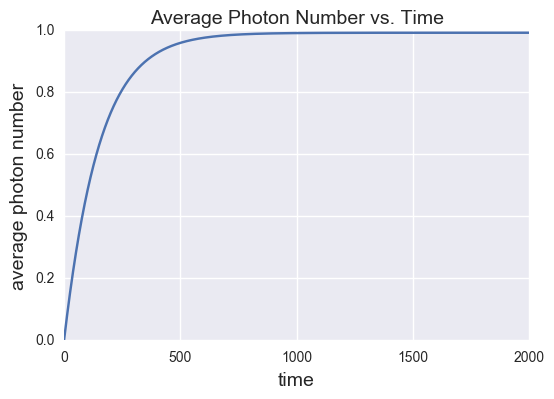

In [163]:
lm.plot_n_vs_time();

calculating von Neuman entropy ...


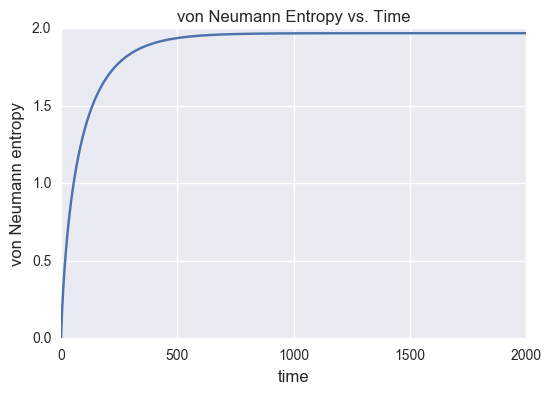

In [164]:
lm.plot_entropy_vs_time();

## 4. Steady values around the threshold

In [186]:
# parameters
w_c = 2.0 * np.pi
w_a = 2.0 * np.pi
g = 0.0025

gamma = 0.01
kappa = 0.01

# initial cavity state
N_max = 100
n_list = np.arange(N_max)
init_psi = fock(N_max, 0)

In [189]:
ratios, ns, entrs, g2s = [], [], [], []
a = destroy(N_max)

for ra in np.arange(0.001, 0.005, 0.0002):
    l = laser.LaserOneMode(w_c, w_a, g, ra, gamma, kappa) # create laser object
    l.set_N_max(N_max)
    
    pn, n, entr = l.solve_steady_state(N_max)
    rho = Qobj(np.diag(pn))
    g2 = expect(a.dag() * a.dag() * a * a, rho) / n**2
    
    ratios.append(ra * kappa/ 4 / g**2)
    ns.append(n)
    entrs.append(entr)
    g2s.append(g2)

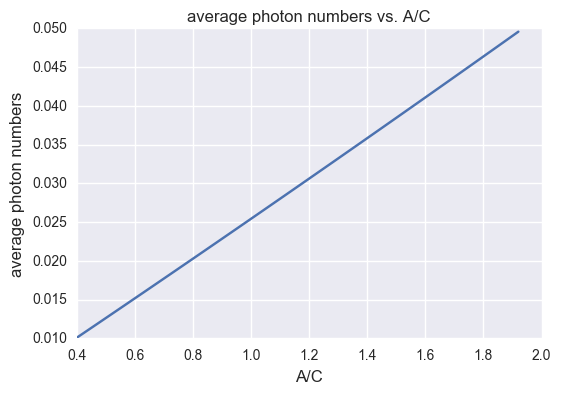

In [191]:
plt.plot(ratios, ns)
plt.title("average photon numbers vs. A/C", fontsize=12)
plt.xlabel("A/C", fontsize=12)
plt.ylabel("average photon numbers", fontsize=12);

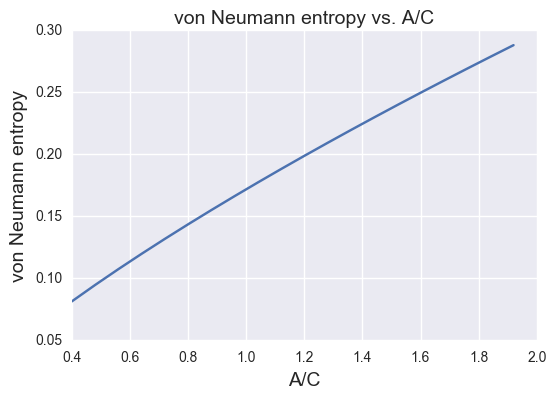

In [192]:
plt.plot(ratios, entrs)
plt.title("von Neumann entropy vs. A/C", fontsize=14)
plt.xlabel("A/C", fontsize=14)
plt.ylabel("von Neumann entropy", fontsize=14);

In [ ]:
g2_cavity = expect(a.dag() * a.dag() * a * a, rho_ss) / (n_cavity ** 2)